What is Bloom Filter?

A Bloom filter is a space-efficient probabilistic data structure that is used to test whether an element is a member of a set. For example, checking availability of username is set membership problem, where the set is the list of all registered username. The price we pay for efficiency is that it is probabilistic in nature that means, there might be some False Positive results. False positive means, it might tell that given username is already taken but actually it’s not.

Suppose you are creating an account on Geekbook, you want to enter a cool username, you entered it and got a message, “Username is already taken”. You added your birth date along username, still no luck. Now you have added your university roll number also, still got “Username is already taken”. It’s really frustrating, isn’t it? 
But have you ever thought about how quickly Geekbook checks availability of username by searching millions of username registered with it. There are many ways to do this job –  

Linear search : Bad idea!
Binary Search : Store all username alphabetically and compare entered username with middle one in list, If it matched, then username is taken otherwise figure out, whether entered username will come before or after middle one and if it will come after, neglect all the usernames before middle one(inclusive). Now search after middle one and repeat this process until you got a match or search end with no match. This technique is better and promising but still it requires multiple steps. 
But, there must be something better!!

Bloom Filter is a data structure that can do this job.



Properties about bloom filter:
    
+ Unlike a standard hash table, a Bloom filter of a fixed size can represent a set with an arbitrarily large number of elements.

+ Adding an element never fails. However, the false positive rate increases steadily as elements are added until all bits in the filter are set to 1, at which point all queries yield a positive result.

+ Bloom filters never generate false negative result, i.e., telling you that a username doesn’t exist when it actually exists.

+ Deleting elements from filter is not possible because, if we delete a single element by clearing bits at indices generated by k hash functions, it might cause deletion of few other elements. Example – if we delete “geeks” (in given example below) by clearing bit at 1, 4 and 7, we might end up deleting “nerd” also Because bit at index 4 becomes 0 and bloom filter claims that “nerd” is not present.

A empty bloom filter is a bit array of m bits, all set to zero, like this figure.
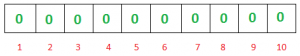

We need k number of hash functions to calculate the hashes for a given input. When we want to add an item in the filter, the bits at k indices h1(x), h2(x), … hk(x) are set, where indices are calculated using hash functions. 
Example – Suppose we want to enter “geeks” in the filter, we are using 3 hash functions and a bit array of length 10, all set to 0 initially. First we’ll calculate the hashes as follows:  
    
h1(“geeks”) % 10 = 1

h2(“geeks”) % 10 = 4

h3(“geeks”) % 10 = 7 

Now we will set the bits at indices 1, 4 and 7 to 1 

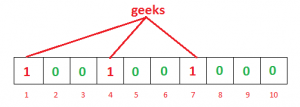


Again we want to enter “nerd”, similarly, we’ll calculate hashes 

h1(“nerd”) % 10 = 3
h2(“nerd”) % 10 = 5
h3(“nerd”) % 10 = 4
Set the bits at indices 3, 5 and 4 to 1 

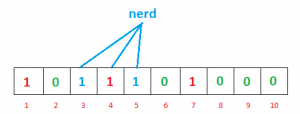

Now if we want to check “geeks” is present in filter or not. We’ll do the same process but this time in reverse order. We calculate respective hashes using h1, h2 and h3 and check if all these indices are set to 1 in the bit array. If all the bits are set then we can say that “geeks” is probably present. If any of the bit at these indices are 0 then “geeks” is definitely not present. 

False Positive in Bloom Filters

The question is why we said “probably present”, why this uncertainty. Let’s understand this with an example. Suppose we want to check whether “cat” is present or not. We’ll calculate hashes using h1, h2 and h3  

h1(“cat”) % 10 = 1
h2(“cat”) % 10 = 3
h3(“cat”) % 10 = 7
If we check the bit array, bits at these indices are set to 1 but we know that “cat” was never added to the filter. Bit at index 1 and 7 was set when we added “geeks” and bit 3 was set we added “nerd”. 

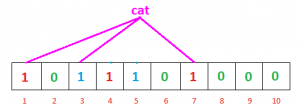


So, because bits at calculated indices are already set by some other item, bloom filter erroneously claims that “cat” is present and generating a false positive result. Depending on the application, it could be huge downside or relatively okay.
We can control the probability of getting a false positive by controlling the size of the Bloom filter. More space means fewer false positives. If we want to decrease probability of false positive result, we have to use more number of hash functions and larger bit array. This would add latency in addition to the item and checking membership. 
Operations that a Bloom Filter supports  

insert(x) : To insert an element in the Bloom Filter.
lookup(x) : to check whether an element is already present in Bloom Filter with a positive false probability.

Probability of False positivity: Let m be the size of bit array, k be the number of hash functions and n be the number of expected elements to be inserted in the filter, then the probability of false positive p can be calculated as:

$P=(1-(1-\frac{1}{m})^{kn})^k \approx (1-e^{\frac{kn}{m}})^k$

P will be minimized with $k=\frac{m}{n}ln2$

Given n and p,best m  is $m=-\frac{nlnP}{(ln2)^2}$.

In [2]:
# Python 3 program to build Bloom Filter 
# Install mmh3 and bitarray 3rd party module first 
# pip install mmh3 
# pip install bitarray 
import math 
import mmh3 
from bitarray import bitarray 
  
  
class BloomFilter(object): 
  
    ''' 
    Class for Bloom filter, using murmur3 hash function 
    '''
  
    def __init__(self, items_count, fp_prob): 
        ''' 
        items_count : int 
            Number of items expected to be stored in bloom filter 
        fp_prob : float 
            False Positive probability in decimal 
        '''
        # False possible probability in decimal 
        self.fp_prob = fp_prob 
  
        # Size of bit array to use 
        self.size = self.get_size(items_count, fp_prob) 
  
        # number of hash functions to use 
        self.hash_count = self.get_hash_count(self.size, items_count) 
  
        # Bit array of given size 
        self.bit_array = bitarray(self.size) 
  
        # initialize all bits as 0 
        self.bit_array.setall(0) 
  
    def add(self, item): 
        ''' 
        Add an item in the filter 
        '''
        digests = [] 
        for i in range(self.hash_count): 
  
            # create digest for given item. 
            # i work as seed to mmh3.hash() function 
            # With different seed, digest created is different 
            digest = mmh3.hash(item, i) % self.size 
            digests.append(digest) 
  
            # set the bit True in bit_array 
            self.bit_array[digest] = True
  
    def check(self, item): 
        ''' 
        Check for existence of an item in filter 
        '''
        for i in range(self.hash_count): 
            digest = mmh3.hash(item, i) % self.size 
            if self.bit_array[digest] == False: 
  
                # if any of bit is False then,its not present 
                # in filter 
                # else there is probability that it exist 
                return False
        return True
  
    @classmethod
    def get_size(self, n, p): 
        ''' 
        Return the size of bit array(m) to used using 
        following formula 
        m = -(n * lg(p)) / (lg(2)^2) 
        n : int 
            number of items expected to be stored in filter 
        p : float 
            False Positive probability in decimal 
        '''
        m = -(n * math.log(p))/(math.log(2)**2) 
        return int(m) 
  
    @classmethod
    def get_hash_count(self, m, n): 
        ''' 
        Return the hash function(k) to be used using 
        following formula 
        k = (m/n) * lg(2) 
  
        m : int 
            size of bit array 
        n : int 
            number of items expected to be stored in filter 
        '''
        k = (m/n) * math.log(2) 
        return int(k) 

In [4]:

from random import shuffle 
  
n = 20 #no of items to add 
p = 0.05 #false positive probability 
  
bloomf = BloomFilter(n,p) 
print("Size of bit array:{}".format(bloomf.size)) 
print("False positive Probability:{}".format(bloomf.fp_prob)) 
print("Number of hash functions:{}".format(bloomf.hash_count)) 
  
# words to be added 
word_present = ['abound','abounds','abundance','abundant','accessible', 
                'bloom','blossom','bolster','bonny','bonus','bonuses', 
                'coherent','cohesive','colorful','comely','comfort', 
                'gems','generosity','generous','generously','genial'] 
  
# word not added 
word_absent = ['bluff','cheater','hate','war','humanity', 
               'racism','hurt','nuke','gloomy','facebook', 
               'geeksforgeeks','twitter'] 
  
for item in word_present: 
    bloomf.add(item) 
  
shuffle(word_present) 
shuffle(word_absent) 
  
test_words = word_present[:10] + word_absent 
shuffle(test_words) 
for word in test_words: 
    if bloomf.check(word): 
        if word in word_absent: 
            print("'{}' is a false positive!".format(word)) 
        else: 
            print("'{}' is probably present!".format(word)) 
    else: 
        print("'{}' is definitely not present!".format(word)) 

Size of bit array:124
False positive Probability:0.05
Number of hash functions:4
'humanity' is a false positive!
'twitter' is a false positive!
'hurt' is definitely not present!
'racism' is definitely not present!
'blossom' is probably present!
'war' is definitely not present!
'hate' is definitely not present!
'bonny' is probably present!
'bluff' is definitely not present!
'bloom' is probably present!
'nuke' is definitely not present!
'cheater' is definitely not present!
'abounds' is probably present!
'abundance' is probably present!
'genial' is probably present!
'generous' is probably present!
'abound' is probably present!
'bonuses' is probably present!
'cohesive' is probably present!
'facebook' is definitely not present!
'gloomy' is definitely not present!
'geeksforgeeks' is definitely not present!
